# Импорт библиотек

In [762]:
import numpy as num
import pandas as pand
import matplotlib.pyplot as plot
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib.colors import ListedColormap

# Лабораторная работа №2.

## Часть 1.

### Задание 1.

##### Чтение датасетов из файлов orders.csv и products.csv.

In [763]:
orders = pand.read_csv("orders.csv")
products = pand.read_csv("products.csv")

print(orders)
print(products)

      OrderID   OrderDate  ProductID  UnitPrice  Quantity  Discount
0       10248  2007-01-30         11      28.62        12      0.00
1       10248  2007-01-30         42      14.04        10      0.00
2       10248  2007-01-30         72      12.71         5      0.00
3       10249  2006-01-29         14      22.80         9      0.00
4       10249  2006-01-29         51     101.20        40      0.00
...       ...         ...        ...        ...       ...       ...
2167    11083  2006-06-16         37       4.50         7      0.00
2168    11083  2006-06-16         42      15.65        10      0.00
2169    11083  2006-06-16         47      25.50         5      0.00
2170    11083  2006-06-16         51      99.90         3      0.03
2171    11083  2006-06-16         62      24.00         5      0.04

[2172 rows x 6 columns]
    ProductID   ProductName  QuantityPerUnit  UnitCost  UnitPrice CategoryName
0           1         Банан               10     15.37      20.00       Фрукты
1

##### 1) Определите число уникальных продуктов в каждой категории

In [764]:
products["CategoryName"].value_counts()

Кондитерские изделия    17
Овощи                   16
Приправы                11
Фрукты                   9
Морепродукты             7
Мясо/Птица               7
Молочные продукты        6
Крупы                    4
Name: CategoryName, dtype: int64

##### 2) Выведите все продукты в категории "Морепродукты"

In [765]:
products[products["CategoryName"] == 'Морепродукты']

,ProductID,ProductName,QuantityPerUnit,UnitCost,UnitPrice,CategoryName
29,9,Омары,10,32.90,39.00,Морепродукты
30,17,Кальмары,36,19.35,25.00,Морепродукты
31,29,Креветки,1,100.74,123.79,Морепродукты
32,45,Крабовые палочки,100,8.44,9.50,Морепродукты
33,47,Мидии мини,14,22.12,25.50,Морепродукты
34,48,Креветки мини,25,28.35,32.75,Морепродукты
35,51,Мидии,10,82.74,99.90,Морепродукты


##### 3) Выведите график числа заказов за каждый прошедший месяц.

<AxesSubplot:xlabel='OrderDate,OrderDate'>

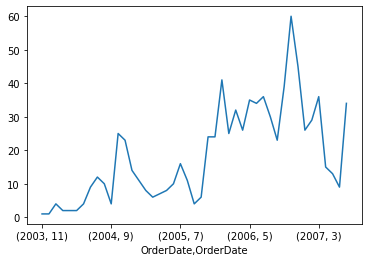

In [766]:
temp = orders.copy()
temp = temp[["OrderID", "OrderDate"]].drop_duplicates()
temp.index = date = pand.to_datetime(temp["OrderDate"])
temp.groupby(by=[temp.index.year, temp.index.month])["OrderDate"].count().plot()

##### Обединим таблицы для дальнейшего удобства.

In [767]:
joined = pand.merge(orders, products, how="inner", on="ProductID")

##### 4) Заведите столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки). Определите самые дорогие заказы (сгруппировав по OrderID)

In [768]:
joined["OrderSum"] = num.where(joined["Discount"] == 0.0, joined["Quantity"] * joined["QuantityPerUnit"] * joined["UnitPrice_x"],
 joined["Quantity"] * joined["QuantityPerUnit"] * joined["UnitPrice_x"] * (1 - joined["Discount"]))

joined

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName,OrderSum
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты,8586.000000
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты,7986.000000
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты,29099.999892
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты,7139.999973
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты,17688.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты,5718.799960
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты,15438.750000
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты,2118.000000
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты,1209.600000


##### 5) Определите продукты с максимальной стоимостью за шт. (не за единицу товара)

In [769]:
joined.groupby(by="UnitCost")["ProductName"].max()

UnitCost
0.89      Лавровый лист
1.65       Булка-улитка
2.65             Курица
3.21                Лук
3.43       Хмели-Сунели
              ...      
67.17             Батат
70.81          Говядина
82.74             Мидии
100.74         Креветки
304.70       Перец чили
Name: ProductName, Length: 75, dtype: object

### Задание 2.

##### 1) Для каждой категории продуктов выведите средний доход от продаж. (OrderSum)

In [770]:
joined.groupby(by="CategoryName")["OrderSum"].mean()

CategoryName
Кондитерские изделия     8910.471721
Крупы                   17822.889924
Молочные продукты        2931.392029
Морепродукты            15559.619538
Мясо/Птица              10385.404127
Овощи                   10015.013521
Приправы                 5602.587698
Фрукты                   6353.007471
Name: OrderSum, dtype: float64

##### 2) Введите столбец "Profit" - разность между доходами и приблизительной закупочной стоимостью проданных товаров.

In [771]:
joined["Profit"] = joined["OrderSum"] - joined["Quantity"] * joined["QuantityPerUnit"] * joined["UnitCost"]

joined

,OrderID,OrderDate,ProductID,UnitPrice_x,Quantity,Discount,ProductName,QuantityPerUnit,UnitCost,UnitPrice_y,CategoryName,OrderSum,Profit
0,10248,2007-01-30,11,28.62,12,0.00,Киви,25,21.1,28.0,Фрукты,8586.000000,2256.000000
1,10296,2004-02-02,11,26.62,12,0.00,Киви,25,21.1,28.0,Фрукты,7986.000000,1656.000000
2,10327,2004-07-08,11,29.10,50,0.20,Киви,25,21.1,28.0,Фрукты,29099.999892,2724.999892
3,10353,2007-06-11,11,29.75,12,0.20,Киви,25,21.1,28.0,Фрукты,7139.999973,809.999973
4,10365,2004-06-24,11,29.48,24,0.00,Киви,25,21.1,28.0,Фрукты,17688.000000,5028.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,10515,2004-12-18,9,42.05,16,0.15,Омары,10,32.9,39.0,Морепродукты,5718.799960,454.799960
2168,10687,2006-04-26,9,41.17,50,0.25,Омары,10,32.9,39.0,Морепродукты,15438.750000,-1011.250000
2169,10693,2006-05-02,9,35.30,6,0.00,Омары,10,32.9,39.0,Морепродукты,2118.000000,144.000000
2170,10848,2007-06-21,9,40.32,3,0.00,Омары,10,32.9,39.0,Морепродукты,1209.600000,222.600000


##### 3) Найдите по убыванию суммарной прибыли категории товаров, обеспечивающие  её 80 процентов. Выведите аналогичные данные только за 2005 и 2006 год.

In [772]:
(joined.groupby(by="CategoryName")["Profit"].sum() / joined["Profit"].sum()).sort_values()


CategoryName
Молочные продукты       0.021873
Мясо/Птица              0.096987
Приправы                0.097838
Фрукты                  0.100063
Морепродукты            0.107323
Крупы                   0.107591
Овощи                   0.229720
Кондитерские изделия    0.238605
Name: Profit, dtype: float64

#### Задание 3.

##### Чтение датасета из файла housing.csv.

In [773]:
housing = pand.read_csv("housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


##### 1) Разбейте датасет на тренировочную, валидационную и тестовую выборку

In [774]:
train_validation, test = train_test_split(housing, test_size = 0.2)
train, validation = train_test_split(train_validation, test_size = 0.2)

print(train)
print(validation)
print(test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12649    -121.47     38.51                52.0         20.0             4.0   
13008    -121.29     38.68                20.0       1881.0           378.0   
10046    -120.99     39.22                16.0       1497.0           275.0   
9501     -123.59     38.80                17.0       5202.0          1037.0   
14365    -117.23     32.72                43.0        952.0           209.0   
...          ...       ...                 ...          ...             ...   
11039    -117.82     33.82                22.0       3173.0           372.0   
960      -121.91     37.69                23.0       2179.0           308.0   
319      -122.19     37.75                19.0       2207.0           565.0   
15993    -122.47     37.76                34.0       2807.0           487.0   
19852    -119.21     36.38                18.0       2158.0           413.0   

       population  households  median_income  media

##### 2) Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

In [775]:
housing_dummy = pand.get_dummies(housing, columns=["ocean_proximity"])

housing_dummy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


##### 3) Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [776]:
housing["total_rooms"] /= housing["households"]
housing["total_bedrooms"] /= housing["households"]
housing.rename(columns={'total_rooms': 'average_rooms'}, inplace=True)
housing.rename(columns={'total_bedrooms': 'average_bedrooms'}, inplace=True)

housing

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,5.045455,1.133333,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,6.114035,1.315789,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,5.205543,1.120092,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,5.329513,1.171920,741.0,349.0,1.8672,84700.0,INLAND


##### 4) В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

In [777]:
housing["average_bedrooms"].fillna(value=housing["average_bedrooms"].mean(), inplace=True)

##### 5) Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [778]:
train["longitude"] = (train["longitude"] - train["longitude"].mean()) / train["longitude"].std()
train["latitude"] = (train["latitude"] - train["latitude"].mean()) / train["latitude"].std()

print(train)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12649  -0.955174  1.355053                52.0         20.0             4.0   
13008  -0.865037  1.434908                20.0       1881.0           378.0   
10046  -0.714809  1.688566                16.0       1497.0           275.0   
9501   -2.016790  1.491277                17.0       5202.0          1037.0   
14365   1.168056 -1.364718                43.0        952.0           209.0   
...          ...       ...                 ...          ...             ...   
11039   0.872607 -0.848009                22.0       3173.0           372.0   
960    -1.175510  0.969870                23.0       2179.0           308.0   
319    -1.315723  0.998054                19.0       2207.0           565.0   
15993  -1.455936  1.002751                34.0       2807.0           487.0   
19852   0.176548  0.354515                18.0       2158.0           413.0   

       population  households  median_income  media

### Часть 2

#### Задание 1.

In [779]:
davis = pand.read_csv("Davis.csv")
davis

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


##### 1) Удалите некорректные данные

In [780]:
davis.dropna(inplace=True)

davis.isna().sum() / len(davis)

Unnamed: 0    0.0
sex           0.0
weight        0.0
height        0.0
repwt         0.0
repht         0.0
dtype: float64

##### 2) Выделите тестовую выборку из 50 экземпляров

In [781]:
train, test = train_test_split(davis, test_size=50)

print(train)
print(test)

     Unnamed: 0 sex  weight  height  repwt  repht
48           49   F      54     174   56.0  173.0
6             7   M      76     167   77.0  165.0
149         150   M      88     184   86.0  183.0
59           60   M      57     173   58.0  170.0
199         200   M      79     177   81.0  178.0
..          ...  ..     ...     ...    ...    ...
130         131   F      62     166   61.0  163.0
168         169   M      96     191   95.0  188.0
145         146   F      55     160   55.0  155.0
159         160   F      57     167   56.0  165.0
66           67   F      64     165   63.0  163.0

[131 rows x 6 columns]
     Unnamed: 0 sex  weight  height  repwt  repht
82           83   F      53     169   52.0  175.0
163         164   F      59     172   58.0  171.0
104         105   F      62     175   63.0  173.0
178         179   M      81     178   82.0  175.0
87           88   F      53     165   53.0  165.0
18           19   M      76     197   75.0  200.0
95           96   F      5

##### 3) На тренировочных данных постройте: Гистограмму height, Гистограмму weight, Эти же гистограммы для разных полов

<AxesSubplot:xlabel='height', ylabel='Count'>

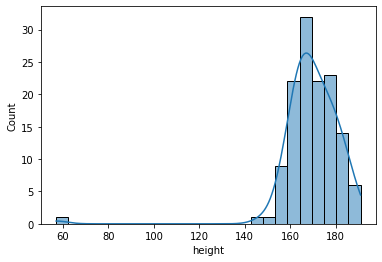

In [782]:
sea.histplot(train["height"], kde = True)

<AxesSubplot:xlabel='weight', ylabel='Count'>

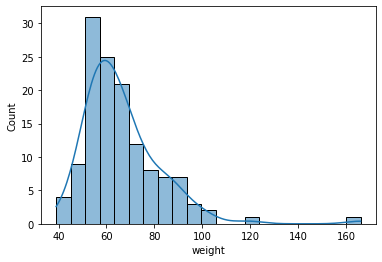

In [783]:
sea.histplot(train["weight"], kde = True)

In [784]:
train_men = train[train["sex"] == 'M']
train_women = train[train["sex"] == 'F']

<AxesSubplot:xlabel='height', ylabel='Count'>

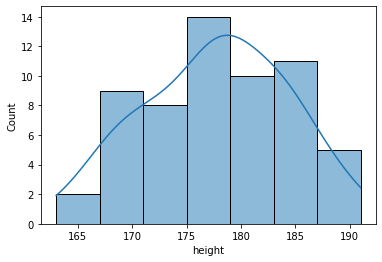

In [785]:
sea.histplot(train_men['height'], kde = True)

<AxesSubplot:xlabel='weight', ylabel='Count'>

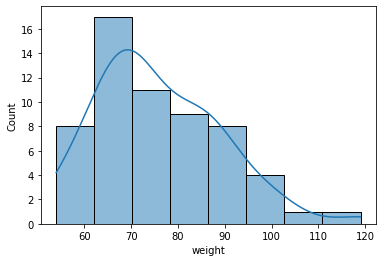

In [786]:
sea.histplot(train_men["weight"], kde = True)

<AxesSubplot:xlabel='height', ylabel='Count'>

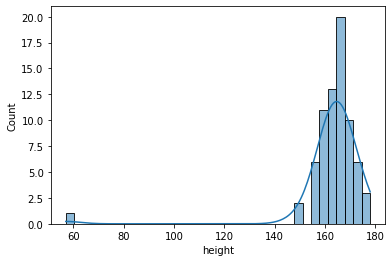

In [787]:
sea.histplot(train_women["height"], kde = True)

<AxesSubplot:xlabel='weight', ylabel='Count'>

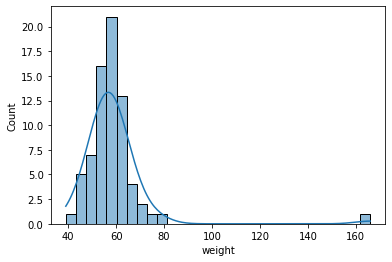

In [788]:
sea.histplot(train_women["weight"], kde = True)

##### 4) На тренировочных данных обучите классификатор пола (sex), используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy). Рекомендуемые модели:  логистическая регрессия, quadratic discriminant analysis.

In [789]:
train.replace({'M': 0, 'F': 1}, inplace=True)
test.replace({'M': 0, 'F': 1}, inplace=True)

trainX = train.loc[:, 'weight':'height'].to_numpy()
trainY = train['sex'].to_numpy()
clf = LogisticRegression().fit(trainX, trainY)
print('Производительность тренировочной:', clf.score(trainX, trainY))

testX = test.loc[:, 'weight':'height'].to_numpy()
testY = test['sex'].to_numpy()
print('Производительность тестовой:', clf.score(testX, testY))

predicts = clf.predict(trainX)

Производительность тренировочной: 0.8702290076335878
Производительность тестовой: 0.96


##### 5) Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором. Сделайте аналогичный график на тестовой выборке.

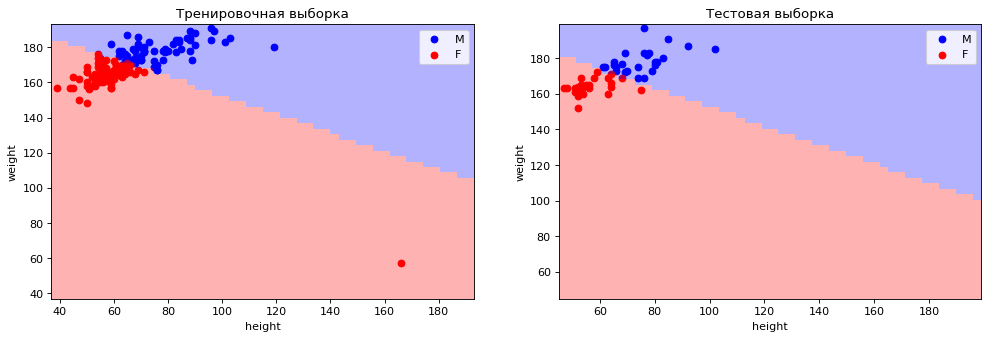

In [790]:
fig = plot.figure(figsize=(15, 10), dpi=80)

ax_1 = fig.add_subplot(2, 2, 3)
ax_2 = fig.add_subplot(2, 2, 4)

x1_min, x1_max = trainX[:, 0].min() - 0.5, trainX[:, 1].max()+0.5
x2_min, x2_max = trainX[:, 0].min() - 0.5, trainX[:, 1].max()+0.5

clf = LogisticRegression().fit(trainX, trainY)

xx1, xx2 = num.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = num.column_stack([xx1.reshape(-1), xx2.reshape(-1)])
y_pred = clf.predict(X_pred)

predicts = clf.predict(trainX)

ax_1.scatter(trainX[predicts == 0][:, 0], trainX[predicts == 0][:, 1], color='blue', label='M')
ax_1.scatter(trainX[predicts == 1][:, 0], trainX[predicts == 1][:, 1], color='red', label='F')
ax_1.set_ylabel('weight')
ax_1.set_xlabel('height')
ax_1.set_title('Тренировочная выборка')
ax_1.pcolormesh(xx1, xx2, y_pred.reshape(xx1.shape), cmap=ListedColormap(['blue', 'red']), alpha=0.3, shading='auto')
ax_1.legend()


x1_min, x1_max = testX[:, 0].min() - 0.5, testX[:, 1].max()+0.5
x2_min, x2_max = testX[:, 0].min() - 0.5, testX[:, 1].max()+0.5

xx1, xx2 = num.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = num.column_stack([xx1.reshape(-1), xx2.reshape(-1)])
y_pred = clf.predict(X_pred)

predicts = clf.predict(testX)
ax_2.scatter(testX[predicts == 0][:, 0], testX[predicts == 0][:, 1], color='blue', label='M')
ax_2.scatter(testX[predicts == 1][:, 0], testX[predicts == 1][:, 1], color='red', label='F')
ax_2.set_ylabel('weight')
ax_2.set_xlabel('height')
ax_2.set_title('Тестовая выборка')
ax_2.pcolormesh(xx1, xx2, y_pred.reshape(xx1.shape), cmap=ListedColormap(['blue', 'red']), alpha=0.3, shading='auto')
ax_2.legend()

plot.show()

#### Задание 2.

##### Чтение данных из таблицы exel.

In [791]:
Folds5x2 = pand.read_excel("Folds5x2_pp.xlsx", sheet_name = "Sheet1")

Folds5x2

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


##### 1) Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [792]:
train_validation, test = train_test_split(Folds5x2, test_size = 0.2)
train, validation = train_test_split(train_validation, test_size = 0.2)

##### 2) Постройте регрессионную модель.  Замерьте коэффициент R^2 и среднюю ошибку предсказания на валидационной выборке.

In [793]:
trainY = train["PE"].to_numpy()
trainX = train.drop(["PE"], axis=1).to_numpy()

valY = validation["PE"].to_numpy()
valX = validation.drop(["PE"], axis=1).to_numpy()

testY = test["PE"].to_numpy()
testX = test.drop(["PE"], axis=1).to_numpy()

In [794]:
linear = LinearRegression().fit(valX, valY)
predictions = linear.predict(valX)

print("R^2 =", linear.score(valX, valY)) 
print("MSE =", mean_squared_error(predictions, valY))

R^2 = 0.9276474511132153
MSE = 21.09702277269368


##### 3) Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели). Отобразите вместе с ними прямую y=t. 

Text(0, 0.5, 'Оценка')

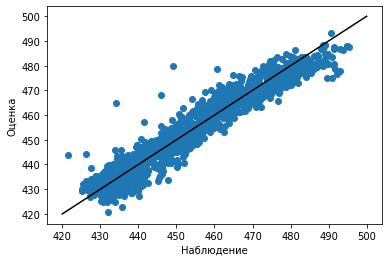

In [795]:
plot.scatter(valY, predictions)
f = lambda x: x
x = num.linspace(420, 500,5)
plot.plot(x, f(x), color = 'k')
plot.xlabel("Наблюдение")
plot.ylabel("Оценка")